#Q1: Image Sharpening
## Image sharpening using unsharp masking

#####Setting up the environment

In [ ]:
# install library to read mat files
!pip install mat73

  Created wheel for mat73: filename=mat73-0.41-cp36-none-any.whl size=3956 sha256=93b910668c9fc3076310d1df82c37204aa5219a90182f86796db8dcde3eb28c6
  Stored in directory: /root/.cache/pip/wheels/9a/bd/45/b45a71083583b335de72a1f656893bb12459303df47d00bead
Successfully built mat73


In [ ]:
# importing all the relevant libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import mat73

#####Below are the two images read and shown for the analysis purpose

1) superMoonCrop.mat - moon

2) lionCrop.mat - lion

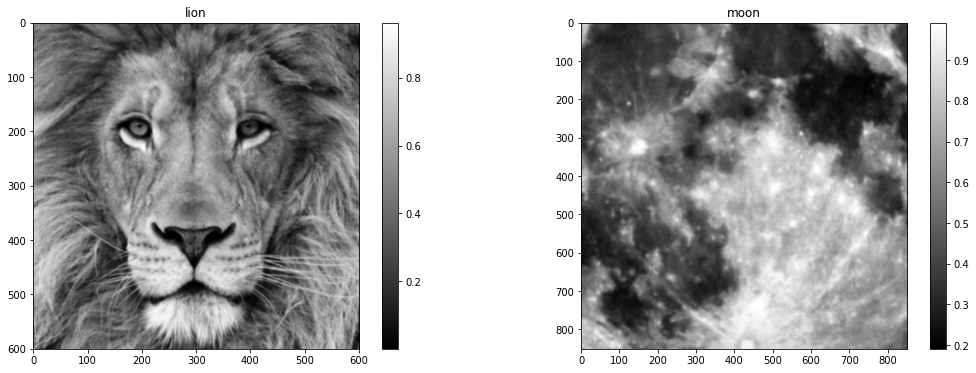

In [ ]:
# loading the images
img1 = mat73.loadmat('../data/lionCrop.mat')
result = img1.items()
data = list(result)
lion = np.array(data)[0][1]
img2 = mat73.loadmat('../data/superMoonCrop.mat')
result = img2.items()
data = list(result)
moon = np.array(data)[0][1]

# visualising the images
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.imshow(lion, cmap='gray')
plt.title('lion')
plt.colorbar()
plt.subplot(122)
plt.imshow(moon, cmap='gray')
plt.title('moon')
plt.colorbar()

#####Linear Contrast Stretching function written in order to linearly scale all the input and output image pairs to the same intensity range of [0, 1]

In [ ]:
def myLinearContrastStretching(img):
    low = np.min(img)
    high = np.max(img)
    new_img = (img-low)/(high-low)
    return new_img

### Implementing the Unsharp Masking Function

#####A function is first written to convolve an image with the given filter which would return the linearly stretched output in the range [0,1]

In [ ]:
def convolve(image, k):
    l, w = image.shape
    # this is the padding done in the image before
    pad = k.shape[0]//2
    # computing the output
    output = np.zeros((l-2*pad, w-2*pad), dtype="float32")
    for y in np.arange(pad, l - pad):
        for x in np.arange(pad, w - pad):
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
            mul = (roi * k).sum()  # sum of all the values
            output[y - pad, x - pad] = mul
    # return linearly stretched output in [0, 1]
    return myLinearContrastStretching(output)

#####Given an image, we wanted to blur it according to the Gaussian distribution. We have implemented another function below to induce Gaussian blur in the image with the tunable parameters as the filter size and standard deviation. Mean is kept fixed at zero.

In [ ]:
def gauss_blur(img, f_dim, sigma):
    l, w = img.shape
    # pad the image accordingly so that convolved image will be of the same dims
    img = np.pad(img, pad_width=f_dim//2, mode='constant', constant_values=0)
    x_, y_ = np.meshgrid(np.linspace(-1,1,f_dim), np.linspace(-1,1,f_dim))
    d = np.sqrt(x_*x_+y_*y_)
    mu = 0.0
    filter = np.exp(-((d-mu)**2 / (2.0*sigma**2)))
    filter = filter/np.sum(filter)  # normalise it for energy conservation
    new_img = convolve(img, filter) # float [0, 1]
    return new_img

In [ ]:
# def average_blur(img, f_dim):
#     l, w = img.shape
#     img = np.pad(img, pad_width=f_dim//2, mode='constant', constant_values=0)
#     filter = np.ones((f_dim, f_dim), dtype="float32")
#     filter = filter/np.sum(filter)
#     new_img = convolve(img, filter)
#     return new_img

#### myUnsharpMasking function:
> This function returns the sharped image for any input image that is fed into it. The input image is first stretched to be in the [0, 1] range for better visualization later which we would be doing in this question

> The parameters for this function beside the image itself are standard deviation (sigma) and a scaling_factor

> Firstly we create a blurred version of the input image with the specifications for blurring being: Gaussian blur with provided standard deviation sigma and filter size of 9 x 9. This is achieved by using our gauss_blur function which would return the output in the range [0, 1]

> We then invert this blurred image and multiply it with the provided scaling factor

> Finally the scaled inverted blurred image is added to the linearly stretched input image and we return this image after again bringing it to [0, 1] range which would be our sharped image output

In [ ]:
def myUnsharpMasking(img, sigma, scaling_factor):
    blurred = gauss_blur(img, 9, sigma)
    # plt.imshow(blurred, cmap='gray')
    inv_blur = 1-blurred
    inv_blur = inv_blur * scaling_factor
    sharp = img/2+inv_blur/2  # making sure sum doesn't exceed 1.0
    return myLinearContrastStretching(sharp)  # float [0, 1]

### Analysis for the first image:

Standard Deviation: 1.2

Scaling factor: 0.4

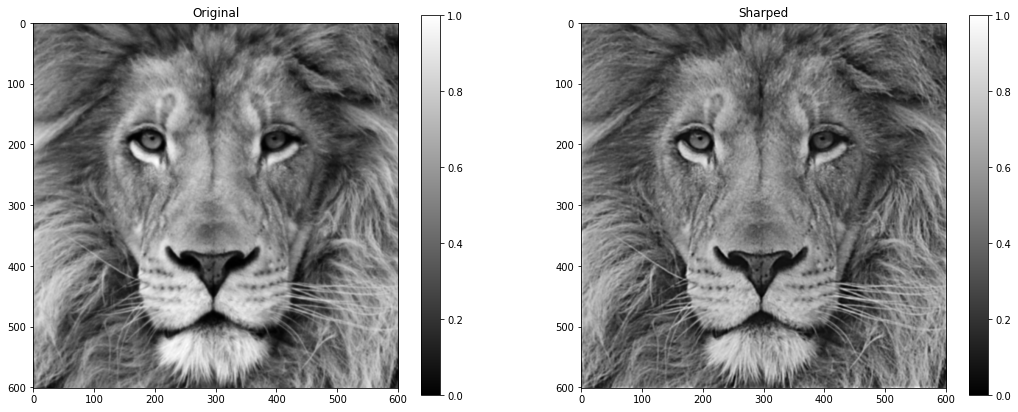

In [ ]:
lion_n = myLinearContrastStretching(lion)  #[0, 1] float
sharp_lion = myUnsharpMasking(lion_n, 1.2, 0.4)  #[0, 1] float

plt.figure(figsize=(18,7))

plt.subplot(121)
plt.imshow(lion_n, cmap='gray')
plt.title('Original')
plt.colorbar()

plt.subplot(122)
plt.imshow(sharp_lion, cmap='gray')
plt.title('Sharped')
plt.colorbar()

Standard Deviation: 1.5

Scaling factor: 0.4

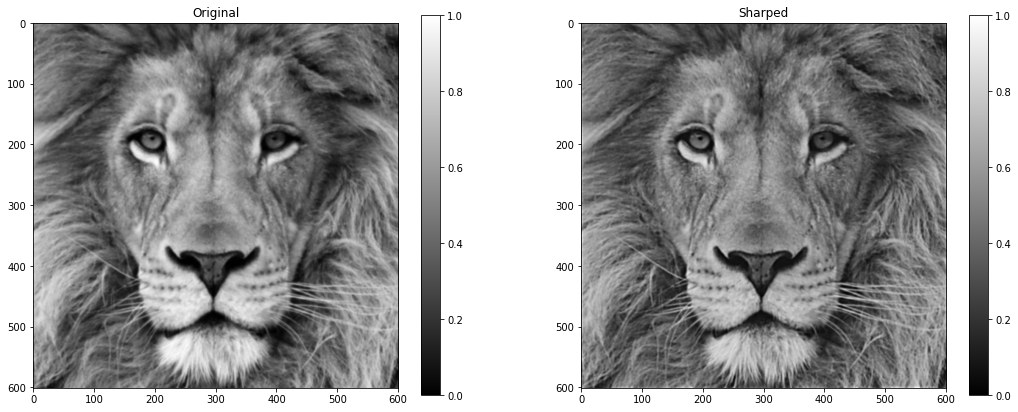

In [ ]:
lion_n = myLinearContrastStretching(lion)  #[0, 1] float
sharp_lion = myUnsharpMasking(lion_n, 1.5, 0.4)  #[0, 1] float

plt.figure(figsize=(18,7))

plt.subplot(121)
plt.imshow(lion_n, cmap='gray')
plt.title('Original')
plt.colorbar()

plt.subplot(122)
plt.imshow(sharp_lion, cmap='gray')
plt.title('Sharped')
plt.colorbar()

Standard Deviation: 1.2

Scaling factor: 0.6

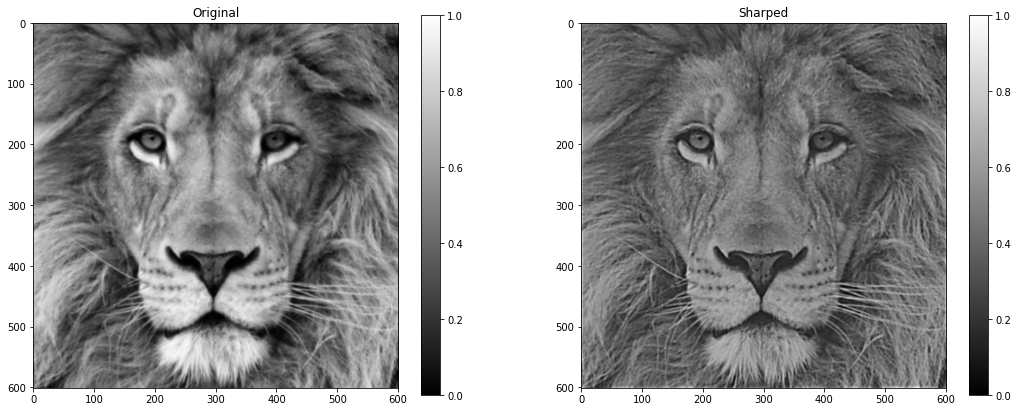

In [ ]:
lion_n = myLinearContrastStretching(lion)  #[0, 1] float
sharp_lion = myUnsharpMasking(lion_n, 1.2, 0.6)  #[0, 1] float

plt.figure(figsize=(18,7))

plt.subplot(121)
plt.imshow(lion_n, cmap='gray')
plt.title('Original')
plt.colorbar()

plt.subplot(122)
plt.imshow(sharp_lion, cmap='gray')
plt.title('Sharped')
plt.colorbar()

### Analysis for the second image:

Standard Deviation: 1.2

Scaling factor: 0.4

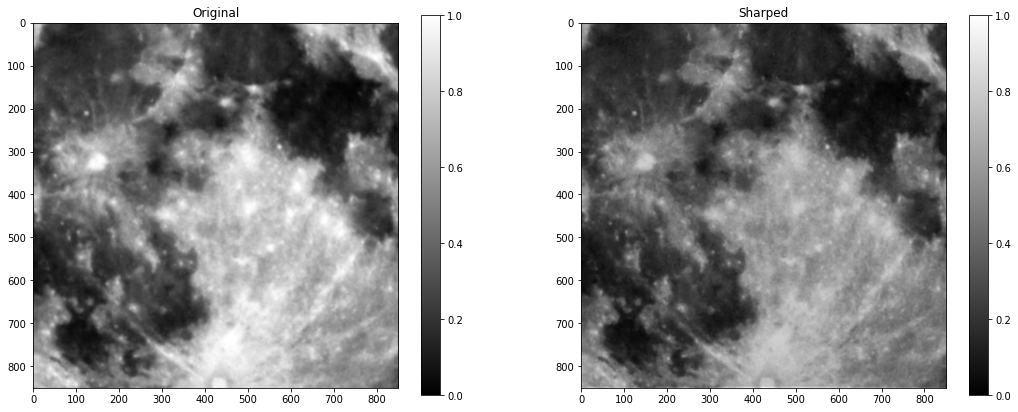

In [ ]:
moon_n = myLinearContrastStretching(moon)  #[0, 1] float
sharp_moon = myUnsharpMasking(moon_n, 1.2, 0.4)  #[0, 1] float

plt.figure(figsize=(18,7))

plt.subplot(121)
plt.imshow(moon_n, cmap='gray')
plt.title('Original')
plt.colorbar()

plt.subplot(122)
plt.imshow(sharp_moon, cmap='gray')
plt.title('Sharped')
plt.colorbar()

Standard Deviation: 1.5

Scaling factor: 0.4

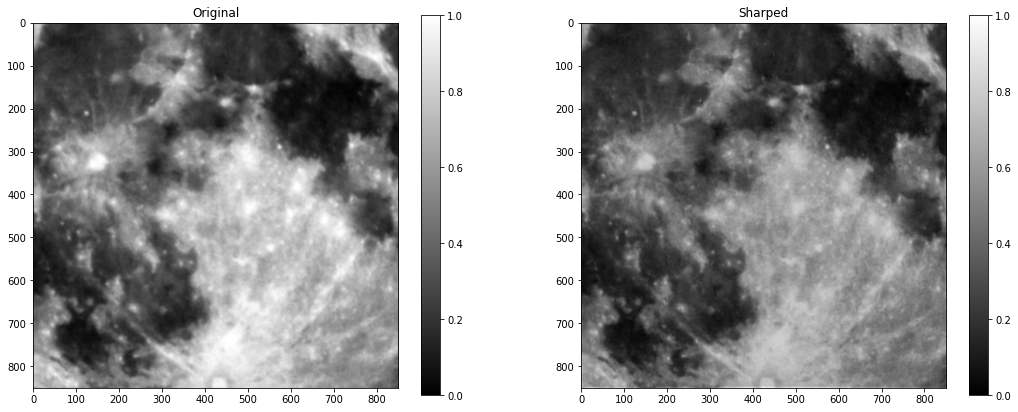

In [ ]:
moon_n = myLinearContrastStretching(moon)  #[0, 1] float
sharp_moon = myUnsharpMasking(moon_n, 1.5, 0.4)  #[0, 1] float

plt.figure(figsize=(18,7))

plt.subplot(121)
plt.imshow(moon_n, cmap='gray')
plt.title('Original')
plt.colorbar()

plt.subplot(122)
plt.imshow(sharp_moon, cmap='gray')
plt.title('Sharped')
plt.colorbar()

Standard Deviation: 1.0

Scaling factor: 0.5

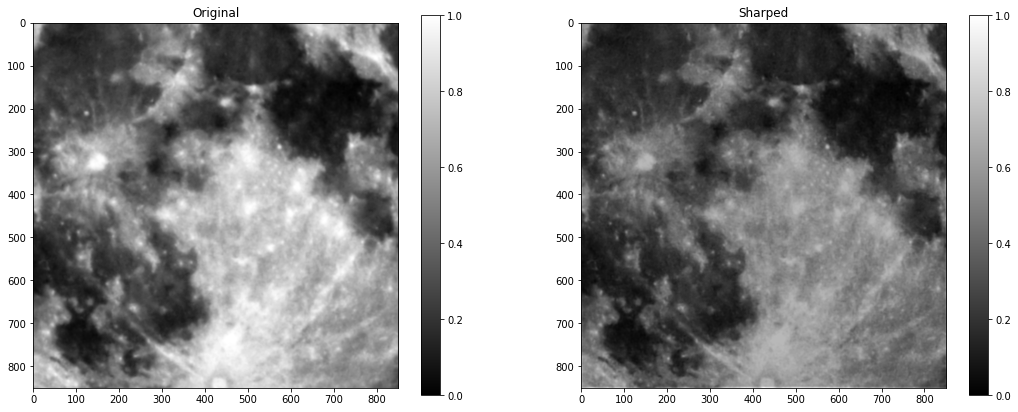

In [ ]:
moon_n = myLinearContrastStretching(moon)  #[0, 1] float
sharp_moon = myUnsharpMasking(moon_n, 1.0, 0.5)  #[0, 1] float

plt.figure(figsize=(18,7))

plt.subplot(121)
plt.imshow(moon_n, cmap='gray')
plt.title('Original')
plt.colorbar()

plt.subplot(122)
plt.imshow(sharp_moon, cmap='gray')
plt.title('Sharped')
plt.colorbar()